In [10]:
import math
import numpy as np
import pandas as pd

import scikitplot
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix
import tensorflow.keras
from tensorflow.keras import models
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout,Conv2D,MaxPooling2D
# from tensorflow.keras.applications import ResNet50,Xception,InceptionV3
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.models import Sequential
import os
import cv2
from keras.utils import np_utils

In [2]:
train = (r'C:\Users\snehal\PycharmProjects\FacialEmotionClassification\dataset\images\train')
train_names =[]
train_names =[f for f in sorted(os.listdir(train))]
print(len(train_names))


7


In [3]:
os.listdir(train)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [4]:
validation = (r'C:\Users\snehal\PycharmProjects\FacialEmotionClassification\dataset\images\validation')
validation_names =[]
validation_names = [f for f in sorted(os.listdir(validation))]
print(len(validation_names))

7


In [5]:
print("Categories:")
for i in train_names:
    print(i)

Categories:
angry
disgust
fear
happy
neutral
sad
surprise


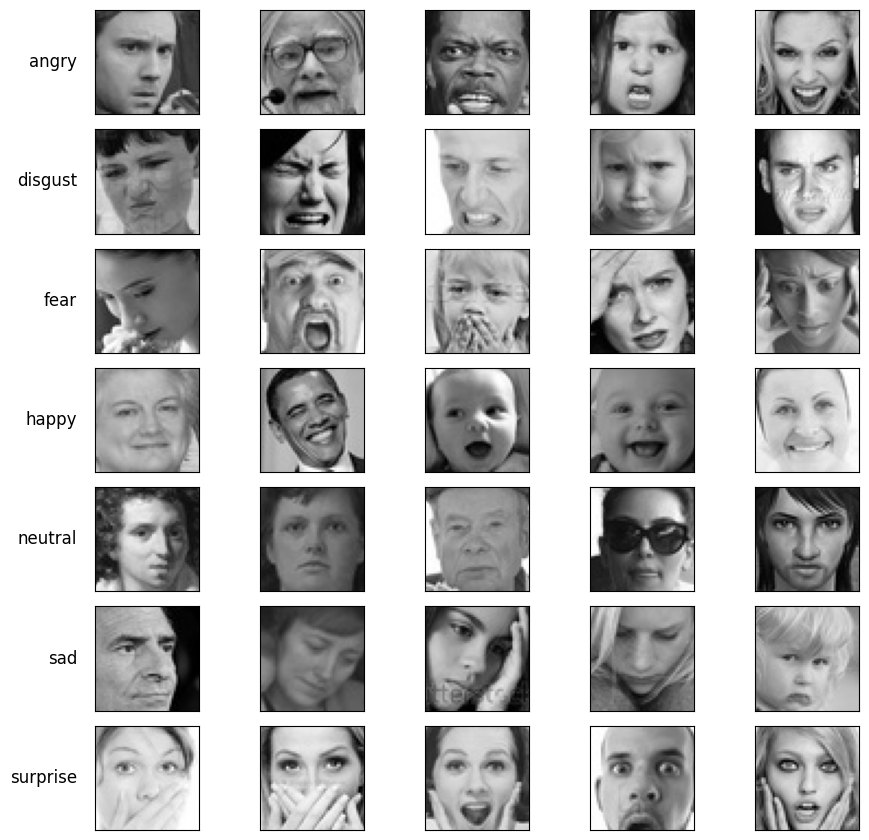

In [6]:
fig,ax = plt.subplots(nrows=7,ncols=5)
fig.set_size_inches(9.5,8.5)
fig.subplots_adjust(wspace=0.1,hspace=0.1)

for i in range(len(train_names)):
    folder_path = train + '/' + str(train_names[i])
    image_names = [img for img in sorted(os.listdir(folder_path))][:5]
    
    for j in range(len(image_names)):
        image_path = folder_path + '/' + image_names[j]
        image = cv2.imread(image_path) 
        ax[i,j].imshow(image)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        if j == 0:
            ax[i,j].annotate(train_names[i], xy=(0, 0.5), xytext=(-ax[i,j].yaxis.labelpad - 5,0),
                xycoords=ax[i,j].yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
        
fig.tight_layout()

In [7]:
for expression in os.listdir(train):
    print(str(len(os.listdir(train + "/" + expression))) + " " + expression + " images")

3993 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images


In [8]:
from keras.preprocessing.image import ImageDataGenerator

pic_size = 48
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_gen = datagen_train.flow_from_directory(train ,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

valid_gen = datagen_validation.flow_from_directory(validation,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [21]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(filters=256,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25)),
model.add(BatchNormalization()),
model.add(Conv2D(filters=150,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25)),
model.add(BatchNormalization()),
model.add(Conv2D(filters=70,kernel_size = (3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(7,activation = 'softmax'))

model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [22]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 44, 44, 256)       73984     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 256)      0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 22, 22, 256)       0         
                                                                 
 batch_normalization_4 (Batc  (None, 22, 22, 256)      1024      
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 150)      

In [ ]:
history = model.fit(train_gen, epochs=30, validation_data=valid_gen)

Epoch 1/30
176/226 [======================>.......] - ETA: 1:08 - loss: 1.8404 - acc: 0.2407

In [13]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# history = model.fit(train_gen, epochs=30, batch_size=250, validation_data=valid_gen, callbacks=[callback])

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_1/conv2d_2/Relu' defined at (most recent call last):
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\snehal\AppData\Local\Temp\ipykernel_28692\53385575.py", line 2, in <module>
      history = model.fit(train_gen, epochs=30, batch_size=250, validation_data=valid_gen, callbacks=[callback])
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\engine\training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\engine\training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\engine\training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\engine\training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\engine\training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\engine\training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\engine\sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\engine\functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\engine\functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\engine\base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "C:\Users\snehal\.conda\envs\FacialEmotionClassification\lib\site-packages\keras\backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/conv2d_2/Relu'
input depth must be evenly divisible by filter depth: 1 vs 3
	 [[{{node sequential_1/conv2d_2/Relu}}]] [Op:__inference_train_function_2940]

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout    
    plt.show()
    
tr_plot(history,0)

In [ ]:
# def predictor(test_gen, test_steps):
#     y_pred= []
#     y_true=test_gen.labels
#     classes=list(test_gen.class_indices.keys())
#     class_count=len(classes)
#     errors=0
#     preds=model.predict(test_gen, verbose=1)
#     tests=len(preds)    
#     for i, p in enumerate(preds):        
#         pred_index=np.argmax(p)         
#         true_index=test_gen.labels[i]  # labels are integer values        
#         if pred_index != true_index: # a misclassification has occurred                                           
#             errors=errors + 1
#             file=test_gen.filenames[i]            
#         y_pred.append(pred_index)
            
#     acc=( 1-errors/tests) * 100
#     print(f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}')
#     ypred=np.array(y_pred)
#     ytrue=np.array(y_true)
#     if class_count <=30:
#         cm = confusion_matrix(ytrue, ypred )
#         # plot the confusion matrix
#         plt.figure(figsize=(12, 8))
#         sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
#         plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
#         plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
#         plt.xlabel("Predicted")
#         plt.ylabel("Actual")
#         plt.title("Confusion Matrix")
#         plt.show()
#     clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
#     print("Classification Report:\n----------------------\n", clr)
#     return errors, tests
# errors, tests=predictor(test_gen, test_steps)

In [ ]:
model.save("CNNBasedFacialEmotionClassification.h5")

In [ ]:
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix

y_true = []
y_pred = []

for i in os.listdir('Food-5K/evaluation'):
    img = Image.open('Food-5K/evaluation/' + i)
    img = img.resize((224, 224))
    img = np.array(img)
    img = np.expand_dims(img, 0)
    
    y_true.append(int(i.split('_')[0]))
    y_pred.append(1 if model.predict(img) > 0.5 else 0)
    
print(classification_report(y_true, y_pred))
print()
print(confusion_matrix(y_true, y_pred))